Problem:
    
- Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved.
 
- Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results.

In [56]:
# First neural network with keras 
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adagrad,Adam,RMSprop,SGD 

In [57]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
# sets the graph-level random seed
tf.random.set_seed(42)

In [58]:
#Read from the file and add a column header
col_Names=["x1", "x2", "target"]
df = pd.read_csv("data2_0.75_6.csv",names=col_Names) 

In [59]:
# Display some sample records
df.head(10) 

,x1,x2,target
0,0.156327,0.011857,0
1,0.211109,0.032209,0
2,0.263386,0.060866,0
3,0.312221,0.097541,0
4,0.356707,0.141855,0
5,0.395976,0.193337,0
6,0.429210,0.251428,0
7,0.455644,0.315489,0
8,0.474579,0.384803,0
9,0.485388,0.458583,0


In [60]:
#display the size of the file.
df.shape 

(498, 3)

In [61]:
#display the data types of the column
df.dtypes 

x1        float64
x2        float64
target      int64
dtype: object

In [62]:
# Check for missing values
if df.isna().sum().sum() == 0:
    print('No missing values.')

No missing values.


In [63]:
# Check for duplicate 
if df['x1'].duplicated().any() == False:
    print('No duplicate.')
else :
    print('Possible duplicate')

No duplicate.


In [64]:
# split the data into input and output separately.
y = df['target']
X = df.drop(['target'],axis=1)
print("X : ",X.shape)
print("y : ",y.shape)

X :  (498, 2)
y :  (498,)





## DNN Model



In [65]:
# Function to create DNN model, fit and train/test using the data provided
# Function also accept hyper parameters as input
# Function will display the result of the model accuracy and plot the graph
def dnn_model_fit(X_train, X_test, y_train, y_test,hidden_activation,output_activation,optimizer,no_hidden_layers,no_of_hidden_nodes_layer,epochs,batch_size,learning_rate):
    
    print("DNN: Run \n")
    print("Hyper Parameters:\n")
    print("No. of Hidden Layers: ",no_hidden_layers)
    print("No. of Hidden nodes per layer: ",no_of_hidden_nodes_layer)
    print("Activation function for Hidden Layer : ",hidden_activation)
    print("Activation function for Output Layer : ",output_activation)
    print("Optimizer: ",optimizer)
    print("epochs : ",epochs)
    print("Batch Size : ",batch_size)
    print("Learning Rate : ",learning_rate)
    

    # Create a model object
    dnnModel = models.Sequential()
    # Layer 0 = input layer
    # specify the input size in the first layer.
    dnnModel.add( Input(X_train.shape[1],))

    # Layer  hidden layer based on input
    for i in range(0,no_hidden_layers):
      dnnModel.add(layers.Dense(no_of_hidden_nodes_layer, activation=hidden_activation))

    # Layer output layer
    dnnModel.add(layers.Dense(1, activation=output_activation))
    #dnnModel.summary()

    if optimizer == 'rmsprop':
      opt = RMSprop(learning_rate=learning_rate)
    if optimizer == 'sgd':
      opt = SGD(learning_rate=learning_rate)
    if optimizer == 'adagrad':
      opt = Adagrad(learning_rate=learning_rate)
    else:
      opt = Adam(learning_rate=learning_rate)

    dnnModel.compile( optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'] )

    # train the model
    h  = dnnModel.fit( X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size,verbose=0)
    print("Final training accuracy: {} , loss: {}".format( h.history['accuracy'][-1], h.history['loss'][-1]))
    print("Final Validation accuracy: {} , loss: {}".format( h.history['val_accuracy'][-1], h.history['val_loss'][-1]))


    # plot the training accuracy
    plt.plot(h.history['accuracy'], label='Train Acc')
    plt.plot(h.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Plot of Training Accuracy ')
    plt.legend()
    plt.show()

    # plot the training loss
    plt.plot(h.history['loss'], label='Train loss')
    plt.plot(h.history['val_loss'], label='Val loss') 
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Plot of Training Loss ')
    plt.legend()
    plt.show()
    print("-------------------------------------------------------------------------------------------")
    return (h.history['loss'][-1],h.history['val_loss'][-1],h.history['accuracy'][-1],h.history['val_accuracy'][-1])


In [75]:
# Training and validation data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

### Tune the model with various hyper parameter choices:

First we will try to test different activation function.

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  relu
Optimizer:  sgd
epochs :  500
Batch Size :  30
Learning Rate :  0.001
Final training accuracy: 0.5488505959510803 , loss: 0.6992172588562143
Final Validation accuracy: 0.5333333611488342 , loss: 0.7317052483558655


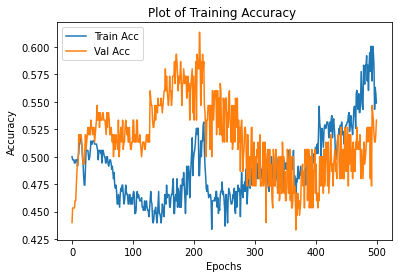

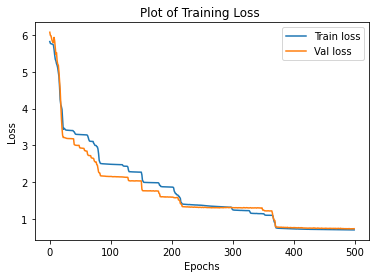

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  sgd
epochs :  500
Batch Size :  30
Learning Rate :  0.001
Final training accuracy: 0.5632184147834778 , loss: 0.6885951849920996
Final Validation accuracy: 0.5400000214576721 , loss: 0.6895253658294678


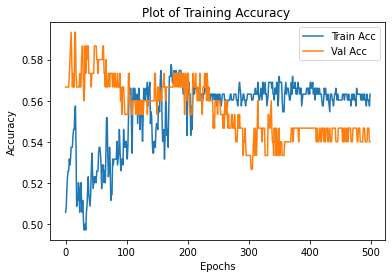

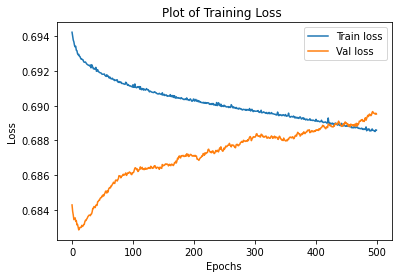

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  tanh
Activation function for Output Layer :  tanh
Optimizer:  sgd
epochs :  500
Batch Size :  30
Learning Rate :  0.001
Final training accuracy: 0.545976996421814 , loss: 0.6544509396470827
Final Validation accuracy: 0.5866666436195374 , loss: 0.692924165725708


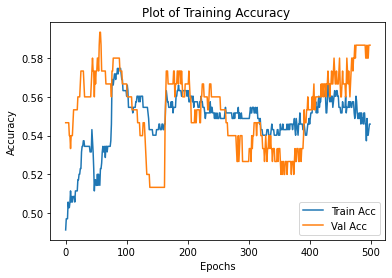

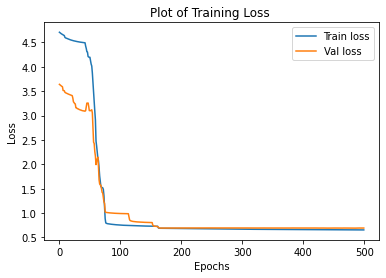

-------------------------------------------------------------------------------------------


,Activation Functions,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,relu,0.548851,0.533333,0.699217,0.731705
1,sigmoid,0.563218,0.540000,0.688595,0.689525
2,tanh,0.545977,0.586667,0.654451,0.692924


In [67]:

# Tune Activation Function by keeping other hyperparamters constant
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = ['relu','sigmoid','tanh']
optimizer = 'sgd'
hidden_nodes = 4
hidden_layers = 1
epochs = 500
batch_size = 30
learning_rate = .001
for i in range(len(activation)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation[i],activation[i],optimizer,hidden_layers,hidden_nodes,epochs,batch_size,learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Activation Functions': activation,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results



### **Observation 1:** 
Based on the accuracy and loss, sigmoid activation function looks better. Though all model is not improving after a point, sigmoid function seems to converge faster and smoother for the given hyperparameters. And tanh is not optimal for a deep network, because the gradient diminishes in the deeper parts of the model.

### Next we will at selecting batch size.

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  4
Learning Rate :  0.001
Final training accuracy: 0.5574712753295898 , loss: 0.6842531041167248
Final Validation accuracy: 0.5866666436195374 , loss: 0.6905404369036356


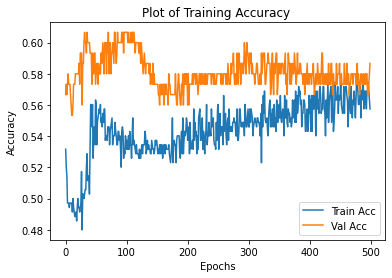

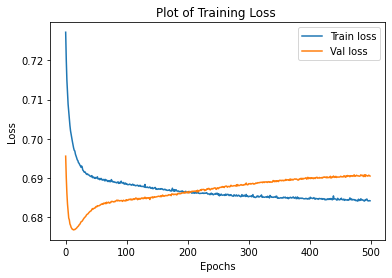

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  8
Learning Rate :  0.001
Final training accuracy: 0.5603448152542114 , loss: 0.6681906724798268
Final Validation accuracy: 0.5333333611488342 , loss: 0.6856239565213521


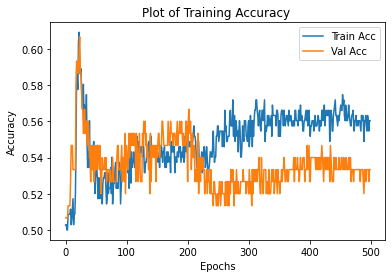

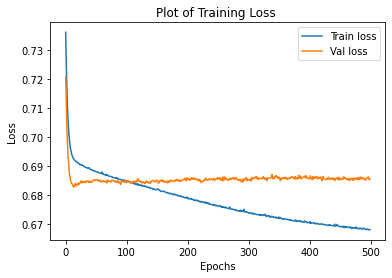

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  32
Learning Rate :  0.001
Final training accuracy: 0.5804597735404968 , loss: 0.6885456367470753
Final Validation accuracy: 0.5199999809265137 , loss: 0.6935276277860005


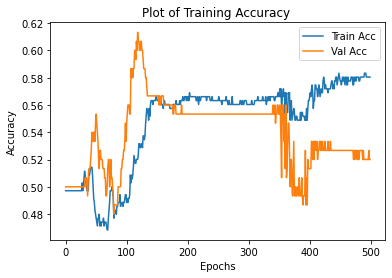

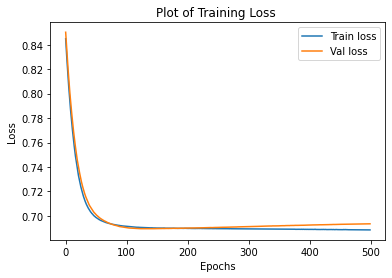

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  64
Learning Rate :  0.001
Final training accuracy: 0.5862069129943848 , loss: 0.6877438021802355
Final Validation accuracy: 0.5733333230018616 , loss: 0.6952601393063863


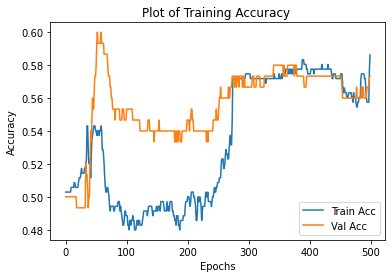

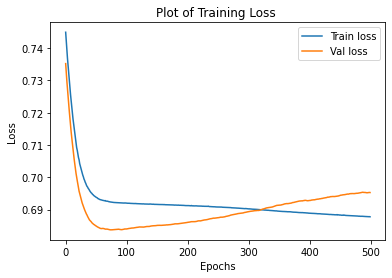

-------------------------------------------------------------------------------------------


,Batch Size,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,4,0.557471,0.586667,0.684253,0.690540
1,8,0.560345,0.533333,0.668191,0.685624
2,32,0.580460,0.520000,0.688546,0.693528
3,64,0.586207,0.573333,0.687744,0.695260


In [73]:
# Tune batch size by keeping other hyperparamters constant
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = 4
hidden_layers = 1
epochs = 500
batch_size =  [ 4, 8, 32, 64 ]
learning_rate = .001 
for i in range(len(batch_size)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation,activation,optimizer,hidden_layers,hidden_nodes,epochs,batch_size[i],learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Batch Size ': batch_size,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Observation 2: 
Batch size are given in multiple of 2 and looking at the data it i not playing much significant role. But Batch size of 64 seems to have little better accuracy than other 

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  sgd
epochs :  500
Batch Size :  64
Learning Rate :  0.001
Final training accuracy: 0.5545976758003235 , loss: 0.6816019868028576
Final Validation accuracy: 0.5266666412353516 , loss: 0.6889755288759868


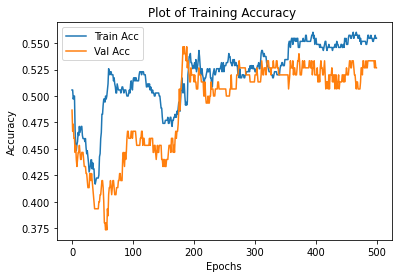

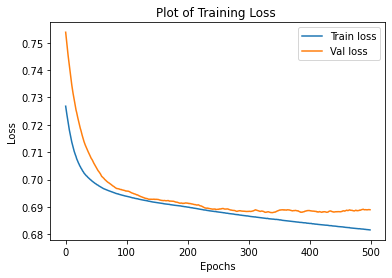

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  64
Learning Rate :  0.001
Final training accuracy: 0.5890804529190063 , loss: 0.6823907275309508
Final Validation accuracy: 0.5733333230018616 , loss: 0.6887532170613607


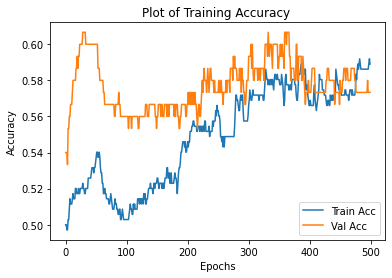

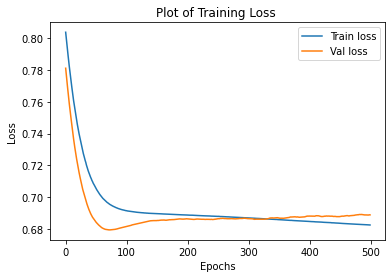

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  adam
epochs :  500
Batch Size :  64
Learning Rate :  0.001
Final training accuracy: 0.5 , loss: 0.6904860865110638
Final Validation accuracy: 0.5666666626930237 , loss: 0.6827074313163757


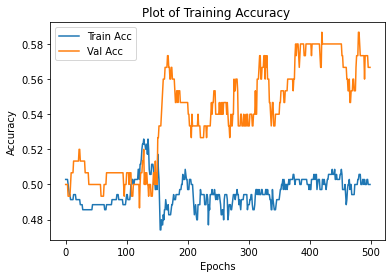

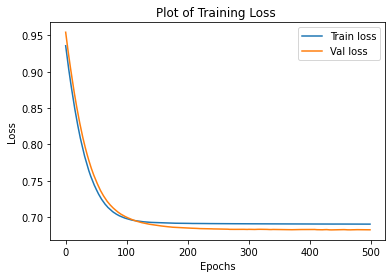

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  adagrad
epochs :  500
Batch Size :  64
Learning Rate :  0.001
Final training accuracy: 0.5086206793785095 , loss: 0.6982137896548742
Final Validation accuracy: 0.5533333420753479 , loss: 0.6945486418406168


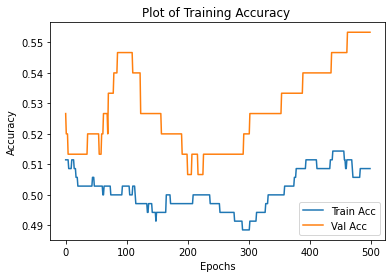

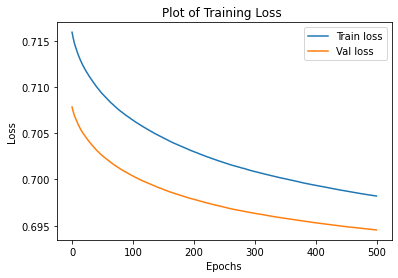

-------------------------------------------------------------------------------------------


,Optimizers,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,sgd,0.554598,0.526667,0.681602,0.688976
1,rmsprop,0.589080,0.573333,0.682391,0.688753
2,adam,0.500000,0.566667,0.690486,0.682707
3,adagrad,0.508621,0.553333,0.698214,0.694549


In [74]:
# Tune Optimizer Function by keeping other hyperparamters constant
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'sigmoid'
optimizer = ['sgd','rmsprop','adam','adagrad']
hidden_nodes = 4
hidden_layers = 1
epochs = 500
batch_size = 64
learning_rate = .001
for i in range(len(optimizer)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation,activation,optimizer[i],hidden_layers,hidden_nodes,epochs,batch_size,learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Optimizers': optimizer,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### **Observation 3:** 
RMSprop provides better loss/accuracy for both training and test. And seems lot finer in converging and finding the minimum loss.

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  32
Learning Rate :  0.3
Final training accuracy: 0.5862069129943848 , loss: 0.6523958225359862
Final Validation accuracy: 0.47333332896232605 , loss: 0.752504042784373


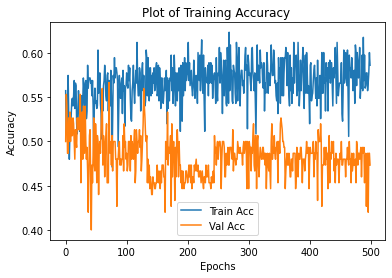

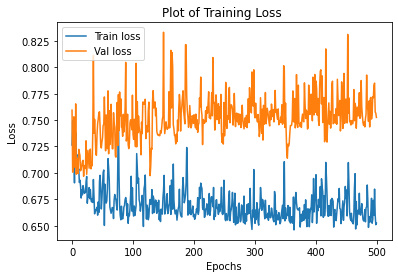

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  32
Learning Rate :  0.1
Final training accuracy: 0.6293103694915771 , loss: 0.6114940081519642
Final Validation accuracy: 0.5933333039283752 , loss: 0.7503005011876425


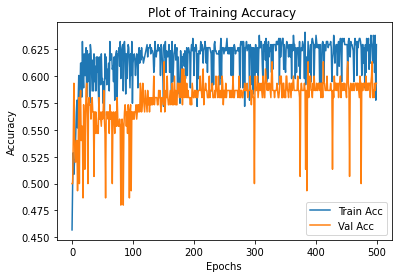

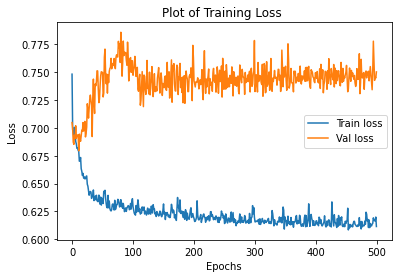

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.6034482717514038 , loss: 0.6494010220999005
Final Validation accuracy: 0.5533333420753479 , loss: 0.7256697106361389


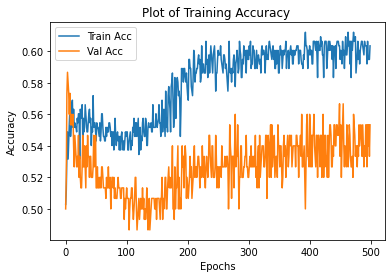

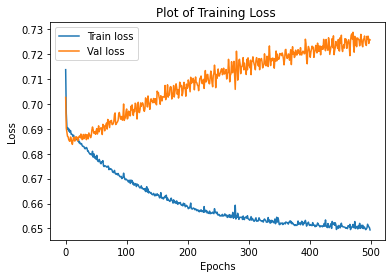

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  32
Learning Rate :  0.001
Final training accuracy: 0.5862069129943848 , loss: 0.6803725896210506
Final Validation accuracy: 0.46666666865348816 , loss: 0.6981840880711874


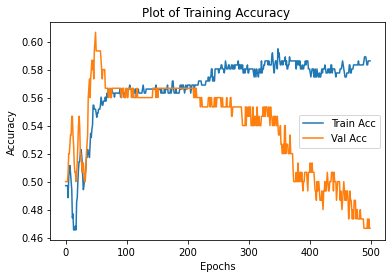

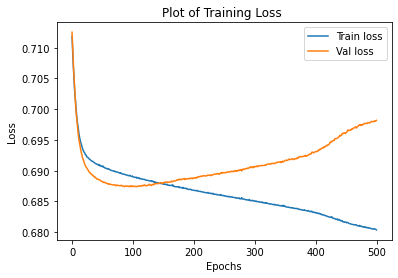

-------------------------------------------------------------------------------------------


,Learning Rate,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,0.300,0.586207,0.473333,0.652396,0.752504
1,0.100,0.629310,0.593333,0.611494,0.750301
2,0.010,0.603448,0.553333,0.649401,0.725670
3,0.001,0.586207,0.466667,0.680373,0.698184


In [77]:
# Tune learning rate by keeping other hyperparamters constant
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = 4
hidden_layers = 1
epochs = 500
batch_size = 32
learning_rate = [ 0.3, .1, .01 , .001 ]
for i in range(len(learning_rate)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation,activation,optimizer,hidden_layers,hidden_nodes,epochs,batch_size,learning_rate[i])
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Learning Rate': learning_rate,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Observation: 
As the learning rate is decreased we see the loss and accuracy graph very smooth but the training time increase. We will use learning rate of 0.1 for smoothing for now.

#### Now we have been working with other hyper parameters the DNN is very simple with one hidden layer and 4 nodes. let us try to modify the number of nodes.

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  8
Learning Rate :  0.1
Final training accuracy: 0.5977011322975159 , loss: 0.6538594728228689
Final Validation accuracy: 0.46000000834465027 , loss: 0.7180957754453023


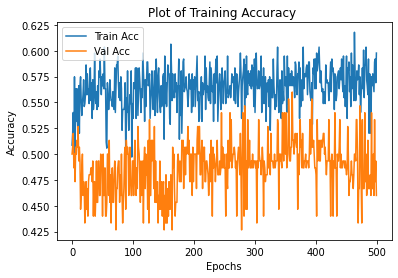

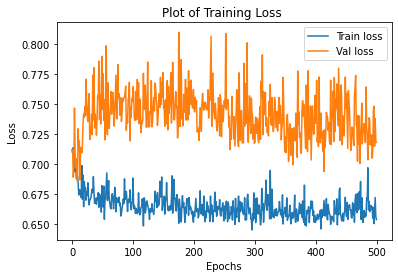

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  8
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  8
Learning Rate :  0.1
Final training accuracy: 0.6637930870056152 , loss: 0.5876355472652391
Final Validation accuracy: 0.46000000834465027 , loss: 0.8366125837961833


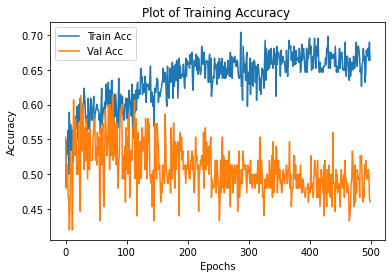

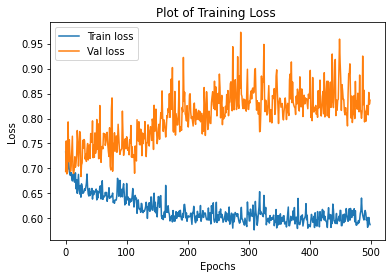

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  12
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  8
Learning Rate :  0.1
Final training accuracy: 0.6695402264595032 , loss: 0.5549245435616066
Final Validation accuracy: 0.4466666579246521 , loss: 0.8501702046394348


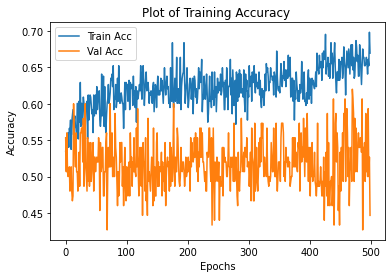

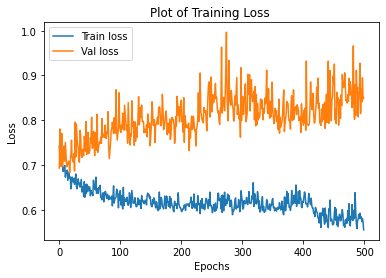

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  16
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  500
Batch Size :  8
Learning Rate :  0.1
Final training accuracy: 0.6867815852165222 , loss: 0.5565568924635306
Final Validation accuracy: 0.5066666603088379 , loss: 0.9181763291358948


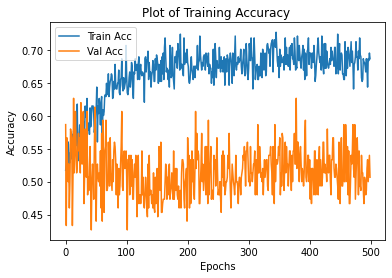

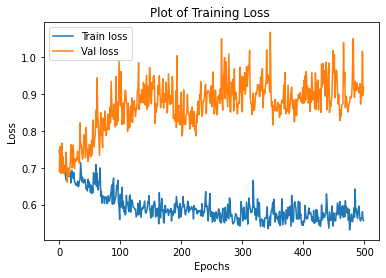

-------------------------------------------------------------------------------------------


,Hidden Nodes,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,4,0.597701,0.460000,0.653859,0.718096
1,8,0.663793,0.460000,0.587636,0.836613
2,12,0.669540,0.446667,0.554925,0.850170
3,16,0.686782,0.506667,0.556557,0.918176


In [78]:
# Tune batch size by keeping other hyperparamters constant
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = [4,8,12,16]
hidden_layers = 1
epochs = 500
batch_size =  8
learning_rate = .1 
for i in range(len(hidden_nodes)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test ,activation,activation,optimizer,hidden_layers,hidden_nodes[i],epochs,batch_size,learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Hidden Nodes': hidden_nodes,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Observation : 
Throwing more nodes for Single Hidden layer has improved training accuracy to a little. It has not allowed the model to be complex enough to fit the data even in training. Model suffers from both high bias and high variance. Since the 16 nodes provide a better training accuracy 69% and validation 50%. Let us try to increase epochs and modify learning rate to see any improvement on accuracy

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  16
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.1
Final training accuracy: 0.7241379022598267 , loss: 0.5004747612722988
Final Validation accuracy: 0.5866666436195374 , loss: 0.9711071411768596


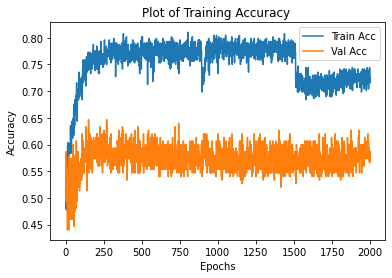

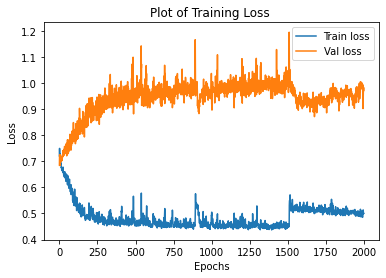

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  16
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.75 , loss: 0.48286883173317746
Final Validation accuracy: 0.47999998927116394 , loss: 1.0298753984769184


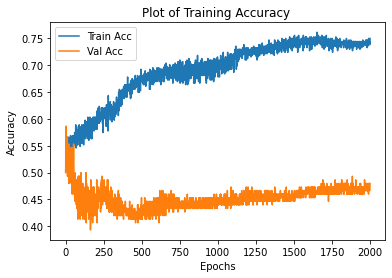

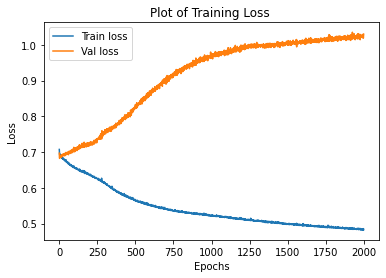

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  16
Activation function for Hidden Layer :  sigmoid
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.001
Final training accuracy: 0.6063218116760254 , loss: 0.6417639810463478
Final Validation accuracy: 0.46666666865348816 , loss: 0.722161070505778


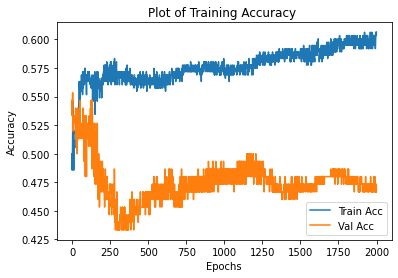

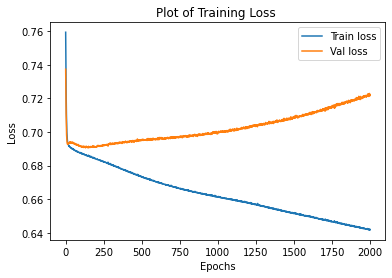

-------------------------------------------------------------------------------------------


,Learning Rates,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,0.100,0.724138,0.586667,0.500475,0.971107
1,0.010,0.750000,0.480000,0.482869,1.029875
2,0.001,0.606322,0.466667,0.641764,0.722161


In [82]:
# Tune Single HD with 16 nodes layer with better epoch and learning rate.
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = 16
hidden_layers = 1
epochs = 2000
batch_size =  32
learning_rate = [ .1 , 0.01 , 0.001 ] 
for i in range(len(learning_rate)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test ,activation,activation,optimizer,hidden_layers,hidden_nodes,epochs,batch_size,learning_rate[i])
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Learning Rates': learning_rate,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Finally One Single Hidden layer with 16 nodes with increasing epochs and slower learning rate was able to improve the training accuracy to max 75% but the validation accuracy 48%. Still the model is very simple not able to fit the data much.

DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  2
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.6063218116760254 , loss: 0.6249909400939941
Final Validation accuracy: 0.5199999809265137 , loss: 0.6870583240191142


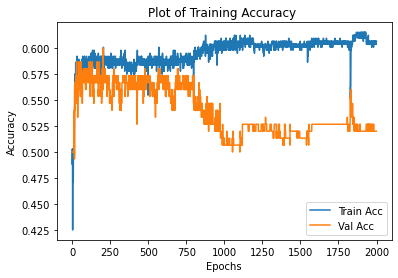

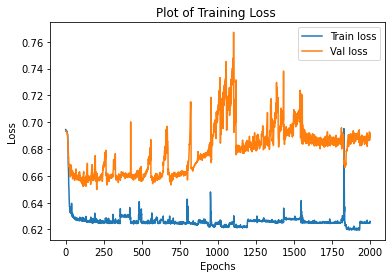

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  2
No. of Hidden nodes per layer:  8
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.8534482717514038 , loss: 0.27668316097095097
Final Validation accuracy: 0.6666666865348816 , loss: 0.770986856619517


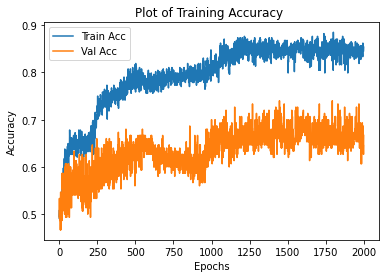

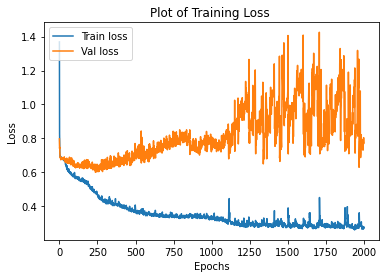

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  2
No. of Hidden nodes per layer:  12
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.8419540524482727 , loss: 0.28203811933254375
Final Validation accuracy: 0.7266666889190674 , loss: 0.7711856830120086


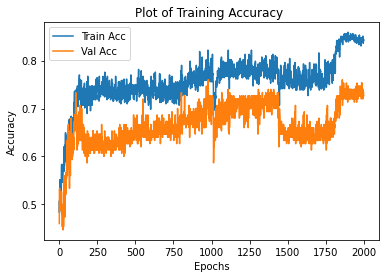

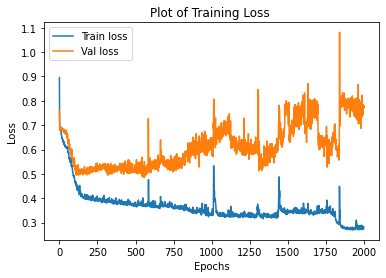

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  2
No. of Hidden nodes per layer:  16
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  32
Learning Rate :  0.01
Final training accuracy: 0.9856321811676025 , loss: 0.027283493741201342
Final Validation accuracy: 0.8666666746139526 , loss: 0.7930783180147409


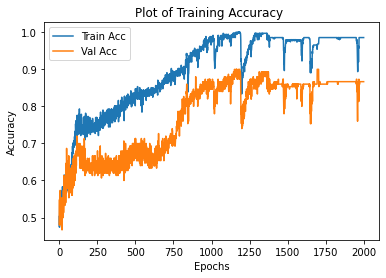

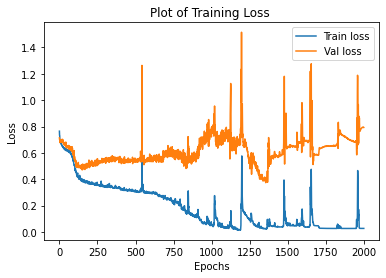

-------------------------------------------------------------------------------------------


,Hidden Nodes,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,4,0.606322,0.520000,0.624991,0.687058
1,8,0.853448,0.666667,0.276683,0.770987
2,12,0.841954,0.726667,0.282038,0.771186
3,16,0.985632,0.866667,0.027283,0.793078


In [85]:
# Let us repeat the same exercise with 2 hidden layer and multiple set of nodes.
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'relu'
op_activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = [4, 8, 12, 16 ]
hidden_layers = 2
epochs = 2000
batch_size =  32
learning_rate = .01 
for i in range(len(hidden_nodes)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation,op_activation,optimizer,hidden_layers,hidden_nodes[i],epochs,batch_size,learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Hidden Nodes ': hidden_nodes,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Result: 
Adding more nodes and more hidden layer has improved the performace of the model. As mode hidden layers are added the model complexity is increased so does the accuracy and overall loss also reduced. We were able to achieve high training accuracy:98% and validation accuracy:86% with this complex model with 2 hidden layer and 16 nodes in each. the training loss is low but the validation is not. We can see the model is over fitting (high variance) the training data very well but not validation data. 

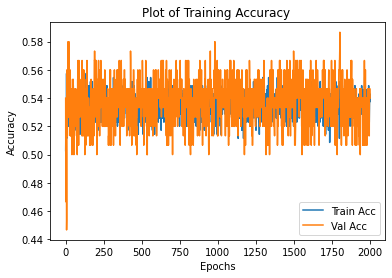

Train: [0.6914874603008402, 0.545977]
Test: [0.6900326069196066, 0.54]


In [93]:
# Let us repeat the same exercise with 2 hidden layer, 16 nodes by adding L2 regularization.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer='l2', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train , validation_data=(X_test,y_test),batch_size=32, epochs=2000, verbose=0)

train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test,y_test, verbose=0)

plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy ')
plt.legend()
plt.show()

print("Train:",train_score)
print("Test:",test_score)

### Result: Adding L2 regularization to the same 2 Hidden layer / 16 nodes each has reduced the training / validation accuracy to 54%

<AxesSubplot:xlabel='x1', ylabel='x2'>

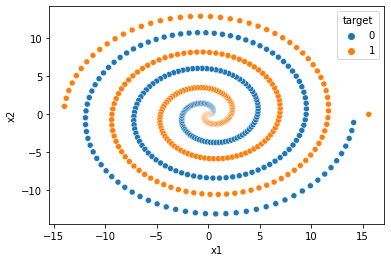

In [95]:
# Let us look at visualize data and see how the pattern
sns.scatterplot(data=df, x="x1", y="x2", hue="target")


### Feature Engineering

In [101]:
# Since the data is spiral in nature. 
# we will try to add few more complex feature quaratic and sin/cos transformation to the data to make more new features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

X_train ["x1^2"]= X_train ["x1"]*X_train ["x1"]
X_train ["x2^2"]= X_train ["x2"]*X_train ["x2"]
X_train ["x1^x2"]= X_train ["x1"]*X_train ["x2"]
X_test ["x1^2"]= X_test ["x1"]*X_test ["x1"]
X_test ["x2^2"]= X_test ["x2"]*X_test ["x2"]
X_test ["x1^x2"]= X_test ["x1"]*X_test ["x2"]
X_train ["sin(x1)"]= np.sin(X_train ["x1"] * np.pi)
X_train ["sin(x2)"]= np.sin(X_train ["x2"] * np.pi)
X_test ["sin(x1)"]= np.sin(X_test ["x1"] * np.pi)
X_test ["sin(x2)"]= np.sin(X_test ["x2"]* np.pi)
X_train.head(10)



,x1,x2,x1^2,x2^2,x1^x2,sin(x1),sin(x2)
324,-3.636894,2.130465,13.226997,4.538879,-7.748273,0.908939,0.398487
146,1.115634,-8.372032,1.244640,70.090924,-9.340125,-0.355338,-0.920271
5,0.395976,0.193337,0.156797,0.037379,0.076557,0.947075,0.570723
127,-7.110214,-1.929234,50.555146,3.721943,13.717266,0.339371,0.220492
252,-0.121320,-0.037902,0.014719,0.001437,0.004598,-0.371978,-0.118791
180,4.375372,9.408831,19.143882,88.526096,41.167137,0.924326,-0.959262
215,-9.891168,-7.417721,97.835195,55.022582,73.369919,0.335285,0.966778
466,8.598699,8.762991,73.937619,76.790008,75.350318,0.952312,0.677668
255,-0.256639,-0.150337,0.065864,0.022601,0.038582,-0.721700,-0.454934
168,9.446162,2.182911,89.229968,4.765098,20.620126,-0.985730,0.543525


In [102]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)


DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  4
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  8
Learning Rate :  0.01
Final training accuracy: 0.6896551847457886 , loss: 0.4877820151975785
Final Validation accuracy: 0.6000000238418579 , loss: 0.5813379740715027


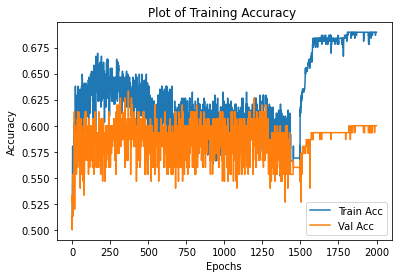

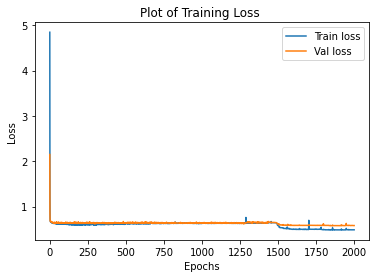

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  8
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  8
Learning Rate :  0.01
Final training accuracy: 0.790229856967926 , loss: 0.35297203218114787
Final Validation accuracy: 0.6733333468437195 , loss: 0.4609993932644526


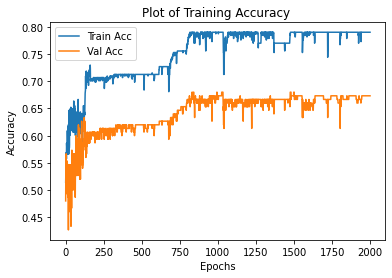

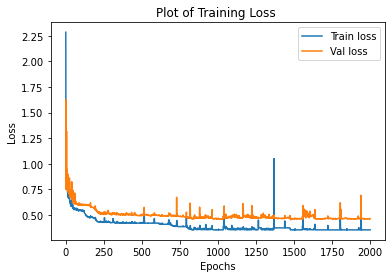

-------------------------------------------------------------------------------------------
DNN: Run 

Hyper Parameters:

No. of Hidden Layers:  1
No. of Hidden nodes per layer:  12
Activation function for Hidden Layer :  relu
Activation function for Output Layer :  sigmoid
Optimizer:  rmsprop
epochs :  2000
Batch Size :  8
Learning Rate :  0.01
Final training accuracy: 0.7643678188323975 , loss: 0.3346608499056344
Final Validation accuracy: 0.6600000262260437 , loss: 0.4302126439412435


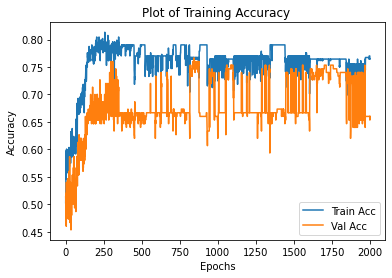

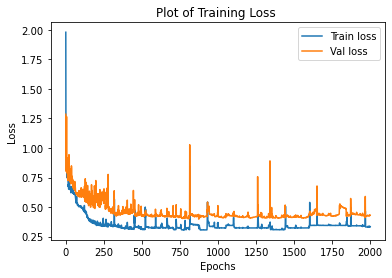

-------------------------------------------------------------------------------------------


,Hidden Nodes,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,4,0.689655,0.600000,0.487782,0.581338
1,8,0.790230,0.673333,0.352972,0.460999
2,12,0.764368,0.660000,0.334661,0.430213


In [105]:
# Let us try with a simple hidden layer with 4 nodes
train_acc_arr , train_loss_arr , val_acc_arr , val_loss_arr = [] , [] , [] , []
activation = 'relu'
op_activation = 'sigmoid'
optimizer = 'rmsprop'
hidden_nodes = [ 4, 8, 12 ]
hidden_layers = 1
epochs = 2000
batch_size =  8
learning_rate = .01 
for i in range(len(hidden_nodes)):
  # fit model and plot learning curves for an optimizer
  (loss,val_loss,acc,val_acc) = dnn_model_fit(X_train, X_test, y_train, y_test, activation,op_activation,optimizer,hidden_layers,hidden_nodes[i],epochs,batch_size,learning_rate)
  train_acc_arr.append(acc)
  val_acc_arr.append(val_acc)
  train_loss_arr.append(loss)
  val_loss_arr.append(val_loss)
results=pd.DataFrame({'Hidden Nodes ': hidden_nodes,'Train Accuracy': train_acc_arr,'Validation Accuracy': val_acc_arr,'Train Loss': train_loss_arr,'Validation Loss':val_loss_arr})
results

### Result: we are able to improve training 79% and validation accuracy 67% with a simple single Hidden layer and 8 nodes but using complex features.

- Adding more layers and more nodes seem to increase the accuracy. But the model is computationally slow and it is complex, overfits and not explainable. 
- Reducing Learning rate makes the model learn faster and smooth coverage faster
- Regualarization improves the difference between training and validation accuracy difference. and make the loss curve smoother
- Adding complex features makes the simple DNN learn more new features and makes the model learn faster. So reducing the hidden layer and reduced node help improve the traing model accuracy and not increase the variance too much. So the loss is much better than more complex over fit model.
